# Distance Estimation from Phase Measurements
In this task, you will work on the data in ‘./Lab_Data/lab3_task1.txt’. The setting of the data collection is as follows. We move the RFID tag in a straight line away from the RFID reader and collect phase measurements. We move the RFID tag away from the RFID reader by a distance d and collect phase measurements at each position. 

You are required to compute the phase change at different positions and use that to estimate the distance d as well as the total distance moved by the tag. 
Plot the phase variation vs Time as well as the distance variation vs time. 

In [ ]:
import numpy as np

def get_phase_change(pha):
    # Unwrap the phase
    radians = pha * np.pi / 180
    unwrapped_radians = np.unwrap(radians,period=np.pi)
    dpha = np.diff(unwrapped_radians)
    # It was seen that the phase is always between 0 and pi, with a discontinuity at pi
    # This is because the we unwrap the phase with period pi 
    return dpha

def get_dist_change(dpha, wavelength = 3e8 / 902750e3):
    ddist = (dpha * wavelength) / (4 * np.pi)
    return ddist

<Figure size 640x480 with 0 Axes>

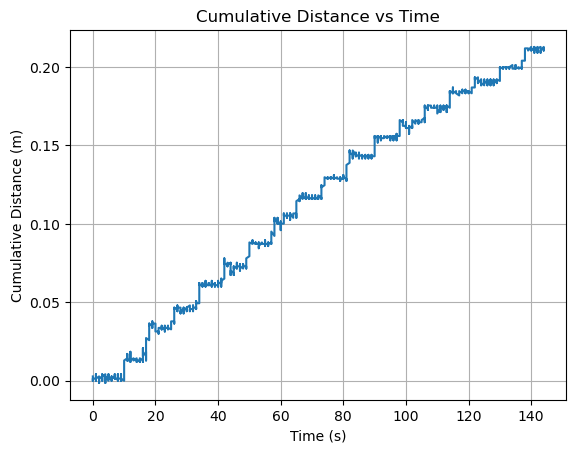

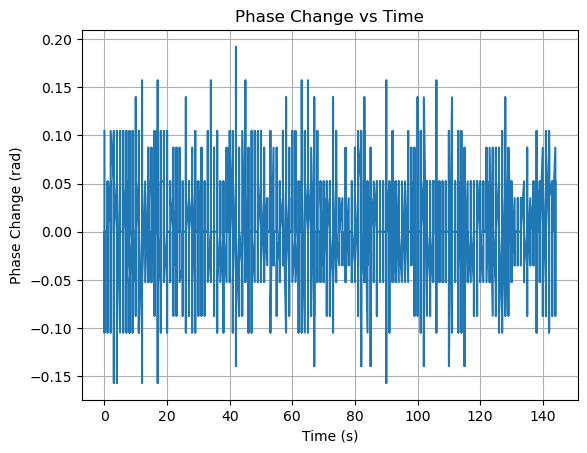

Estimated total distance moved by the tag: 0.2119 meters


In [106]:
from utils import read_data
## Task 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Insert data file path here
file = 'Lab_Data/lab3_task1.txt'

# Read data
channel_log = read_data(file)


# Extract and process data
pha = channel_log['Phase'].astype(float).values
freq = channel_log['Frequency'].iloc[0].astype(float) * 1e3
time = ((channel_log['hour'] * 60 + channel_log['minute']) * 60 + channel_log['second']).astype(float).values
time = time - time[0]
c = 3e8
# Compute phase change and distance change
dpha = get_phase_change(pha)
ddist = get_dist_change(dpha, wavelength= c / freq)

# Cumulative distance
dist = np.cumsum(ddist)

# Plotting Distance vs Time
plt.figure()
plt.figure()
plt.plot(time[:-1], dist)  # Exclude last time point to match size with dist
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Distance (m)')
plt.title('Cumulative Distance vs Time')
plt.grid()


# Plotting Phase vs Time
plt.figure()
plt.plot(time[:-1], dpha)  # Exclude last time point due to np.diff reducing size
plt.xlabel('Time (s)')
plt.ylabel('Phase Change (rad)')
plt.title('Phase Change vs Time')
plt.grid()


plt.show()


estimated_distance = np.sum(ddist)
print(f"Estimated total distance moved by the tag: {estimated_distance:.4f} meters")
